Woodland caribou are found primarily in the western provinces of Canada and the American northwest. The average lifespan of a female is about 14 years. The birth and survival rates for each age bracket are given in Table 3.4, which shows that caribou cows do not give birth at all during their first 2 years and give birth to about one calf per year during their middle years. The mortality rate for young calves is very high.

The numbers of woodland caribou reported in Jasper National Park in Alberta in 1990 are shown in Table 3.5. Using a CAS, predict the caribou population for 1992 and 1994. Then project the population for the years 2010 and 2020. What do you conclude? (What assumptions does this model make, and how could it be improved?)

(-0.5, 415.5, 353.5, -0.5)

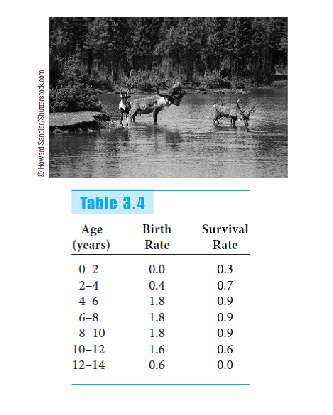

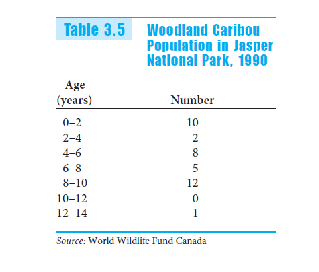

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.figure(figsize=(7, 7))
table1 = mpimg.imread(r'C:\Users\user\Desktop\table3.4.png')
plt.imshow(table1)
plt.axis('off')
plt.figure(figsize=(5, 5))
table2 = mpimg.imread(r'C:\Users\user\Desktop\table3.5.png')
plt.imshow(table2)
plt.axis('off')

In [1]:
import numpy as np
import pandas as pd

birth_rate=np.array([[0,0.4,1.8,1.8,1.8,1.6,0.6]])
survival_rate=np.array([[0.3,0,0,0,0,0,0],
                        [0,0.7,0,0,0,0,0],
                        [0,0,0.9,0,0,0,0],
                        [0,0,0,0.9,0,0,0],
                        [0,0,0,0,0.9,0,0],
                        [0,0,0,0,0,0.6,0]])
Leslie_matirx=np.vstack((birth_rate,survival_rate))
num_start=np.array([[10,2,8,5,12,0,1]]).T

def growth(Leslie_matirx,num_before,start,end):
    L=Leslie_matirx.copy()
    year_after=end-start
    for i in range(year_after-1):
        L=np.dot(L,Leslie_matirx)
    num_after=np.dot(L,num_before)
    return num_after


start_year=1990
num_year=pd.DataFrame(num_start,columns=[str(start_year)],
                      index=['0-2Y','2-4Y','4-6Y','6-8Y','8-10Y','10-12Y','12-14Y'])
end_year=list([1992,1994,2010,2020])
for i in end_year:    
    num=growth(Leslie_matirx,num_start,start_year,i)
    num_year[str(i)]=num

print(num_year)

        1990   1992     1994        2010        2020
0-2Y      10  42.06  38.8188  167.803925  406.230694
2-4Y       2  13.92  10.0944   46.084937  111.559460
4-6Y       8   2.10   8.8326   29.535481   71.486059
6-8Y       5   1.26   8.7696   24.350850   58.894701
8-10Y     12   6.48   1.7010   20.060448   48.520547
10-12Y     0   4.05   1.0206   16.483974   39.973247
12-14Y     1   6.48   3.4992    9.053424   21.954466


Figure 3.30 is a digraph representing a food web in a small ecosystem. A directed edge from a to b indicates that a has b as a source of food. Construct the adjacency matrix A for this digraph and use it to answer the following questions.

(-0.5, 387.5, 281.5, -0.5)

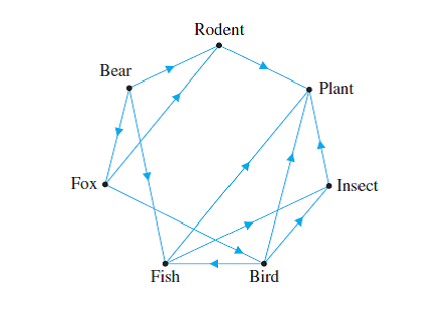

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


plt.figure(figsize=(7, 7))
table1 = mpimg.imread(r'C:\Users\user\Desktop\figure3.3.png')
plt.imshow(table1)
plt.axis('off')

1. Which species has the most direct sources of food? How does A show this?
2. Which species is a direct source of food for the most other species? How does A show this?
3. If a eats b and b eats c, we say that a has c as an indirect source of food. How can we use A to determine which species has the most indirect food sources? Which species has the most direct and indirect food sources combined?
4. Suppose that pollutants kill the plants in this food web, and we want to determine the effect this change will have on the ecosystem. Construct a new adjacency matrix A from A by deleting the row and column corresponding to plants. Repeat parts (a) to (c) and determine which species are the most and least affected by the change.
5. What will the long-term effect of the pollution be? What matrix calculations will show this?

In [5]:
import numpy as np

bear=np.array([0,1,0,0,0,1,1])
rodent=np.array([0,0,1,0,0,0,0])
plant=np.array([0,0,0,0,0,0,0])
insect=np.array([0,0,1,0,0,0,0])
bird=np.array([0,0,1,1,0,1,0])
fish=np.array([0,0,1,1,0,0,0])
fox=np.array([0,1,0,0,1,0,0])
food_source=np.vstack((bear,rodent,plant,insect,bird,fish,fox))

dic_num={}
for i,j in zip(range(7),list(['bear','rodent','plant','insect','bird','fish','fox'])):
    num=food_source[i,:].sum()
    dic={str(j):num}
    dic_num.update(dic)
    print('Num of '+str(j)+' direct sources: ',num)
print('bear and bird have most direct food source')

Num of bear direct sources:  3
Num of rodent direct sources:  1
Num of plant direct sources:  0
Num of insect direct sources:  1
Num of bird direct sources:  3
Num of fish direct sources:  2
Num of fox direct sources:  2
bear and bird have most direct food source


In [6]:
dic_num={}
for i,j in zip(range(7),list(['bear','rodent','plant','insect','bird','fish','fox'])):
    num=food_source[:,i].sum()
    dic={str(j):num}
    dic_num.update(dic)
    print(str(j)+' being num of direct sources: ',num)
print('Being the direct food sources for most ohters:',max(dic_num,key=dic_num.get))

bear being num of direct sources:  0
rodent being num of direct sources:  2
plant being num of direct sources:  4
insect being num of direct sources:  2
bird being num of direct sources:  1
fish being num of direct sources:  2
fox being num of direct sources:  1
Being the direct food sources for most ohters: plant


In [8]:
indirect_food_source=np.dot(food_source,food_source)
dic_num={}
for i,j in zip(range(7),list(['bear','rodent','plant','insect','bird','fish','fox'])):
    num=indirect_food_source[i,:].sum()
    dic={str(j):num}
    dic_num.update(dic)
    print('Num of '+str(j)+' indirect sources: ',num)
print('Having most indirect source of food:',max(dic_num,key=dic_num.get))

Num of bear indirect sources:  5
Num of rodent indirect sources:  0
Num of plant indirect sources:  0
Num of insect indirect sources:  0
Num of bird indirect sources:  3
Num of fish indirect sources:  1
Num of fox indirect sources:  4
Having most indirect source of food: bear


In [10]:
bear=np.array([0,1,0,0,1,1])
rodent=np.array([0,0,0,0,0,0])
plant=np.array([0,0,0,0,0,0])
insect=np.array([0,0,0,0,0,0])
bird=np.array([0,0,1,0,1,0])
fish=np.array([0,0,1,0,0,0])
fox=np.array([0,1,0,1,0,0])
new_food_source=np.vstack((bear,rodent,insect,bird,fish,fox))
indirect_new_food_source=np.dot(new_food_source,new_food_source)
sum_direct_indirect=new_food_source+indirect_new_food_source
dic_num={}
for i,j in zip(range(6),list(['bear','rodent','insect','bird','fish','fox'])):
    num=sum_direct_indirect[i,:].sum()
    dic={str(j):num}
    dic_num.update(dic)
    print('Num of '+str(j)+' direct and indirect sources: ',num)
print('less effected:',max(dic_num,key=dic_num.get),'\n')

dic_num={}
for i,j in zip(range(6),list(['bear','rodent','insect','bird','fish','fox'])):
    num=indirect_new_food_source[:,i].sum()
    dic={str(j):num}
    dic_num.update(dic)
    print(str(j)+' being num of direct and indirect sources: ',num)
print('most effected:',max(dic_num,key=dic_num.get))

Num of bear direct and indirect sources:  6
Num of rodent direct and indirect sources:  0
Num of insect direct and indirect sources:  0
Num of bird direct and indirect sources:  3
Num of fish direct and indirect sources:  1
Num of fox direct and indirect sources:  4
less effected: bear 

bear being num of direct and indirect sources:  0
rodent being num of direct and indirect sources:  1
insect being num of direct and indirect sources:  3
bird being num of direct and indirect sources:  1
fish being num of direct and indirect sources:  1
fox being num of direct and indirect sources:  0
most effected: insect


In [43]:
bear=np.array([0,1,0,0,1,1])
rodent=np.array([0,0,0,0,0,0])
insect=np.array([0,0,0,0,0,0])
bird=np.array([0,0,1,0,1,0])
fish=np.array([0,0,1,0,0,0])
fox=np.array([0,1,0,1,0,0])
new_food_source=np.vstack((bear,rodent,insect,bird,fish,fox))
indirect_new_food_source=np.dot(new_food_source,new_food_source)
sum_direct_indirect=new_food_source+indirect_new_food_source
print('X: num of direct sources for each animal in long term without plants\n \
      AX=X > AX-X=O > (A-I)X=O')
I=np.eye(6,6)
O=np.zeros([6,1])
A_I=new_food_source-I
x=np.linalg.solve(A_I,O)
print('X=',x)
print('In long term without plants, the animal will not have direct food sources at all\n')

print('X: num of indirect sources for each animal in long term without plants\n \
      AX=X > AX-X=O > (A-I)X=O')
I=np.eye(6,6)
O=np.zeros([6,1])
A_I=indirect_new_food_source-I
x=np.linalg.solve(A_I,O)
print('X=',x)
print('In long term without plants, the animal will not have indirect food sources at all\n')

print('X: num of direct and indirect sources for each animal in long term without plants\n \
      AX=X > AX-X=O > (A-I)X=O')
I=np.eye(6,6)
O=np.zeros([6,1])
A_I=sum_direct_indirect-I
x=np.linalg.solve(A_I,O)
print('X=',x)
print('In long term without plants, the animal will have neither direct nor indirect food sources at all\n')

X: num of direct sources for each animal in long term without plants
       AX=X > AX-X=O > (A-I)X=O
X= [[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]
In long term without plants, the animal will not have direct food sources at all

X: num of indirect sources for each animal in long term without plants
       AX=X > AX-X=O > (A-I)X=O
X= [[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]
In long term without plants, the animal will not have indirect food sources at all

X: num of direct and indirect sources for each animal in long term without plants
       AX=X > AX-X=O > (A-I)X=O
X= [[-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [-0.]
 [-0.]]
In long term without plants, the animal will have neither direct nor indirect food sources at all

